<a href="https://colab.research.google.com/github/leunco/Hands_On_MachineLearning/blob/main/6%EC%A3%BC%EC%B0%A8/%EA%B9%80%EB%8B%A4%EC%98%81/Chap13_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%81%EC%9E%AC_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

## Chap13. 텐서플로에서 데이터 적재와 전처리하기
메모리 용량에 맞지 않은 **아주 큰 규모의 데이터셋**으로 딥러닝 시스템을 훈련해야 하는 경우, 다른 딥러닝 라이브러리는 대규모 데이터셋을 효율적으로 로드하고 전처리하도록 구현하기가 까다로운 반면, **텐서플로는 데이터 API 덕분에 이를 쉽게 처리**할 수 있다.

**데이터셋 객체를 만들고, 데이터를 읽어 올 위치와 변환 방법을 지정**하면 된다. 텐서플로가 멀티스레딩, 큐, 배치, 프리페치 같은 상세한 사항을 모두 대신 처리해준다.

기본 기능으로 **데이터 API**는 **CSV 파일, 텍스트 파일, 고정 길이의 레코드를 가진 이진 파일, 텐서플로의 TFRecord 포맷을 사용하는 이진 파일**에서 데이터를 읽을 수 있다. 또한 SQL 데이터베이스에서 읽는 기능을 지원하고, 구글 빅쿼리와 같은 다양한 데이터 소스에서 읽을 수 있는 오픈 소스도 있다.

대용량 데이터는 일반적으로 **정규화** 같은 **데이터 전처리**가 필요하다. 또한 간단한 수치형 피처로만 구성되지 않고, 텍스트 특성이나 범주형 특성 등도 있다. 이런 특성들은 **원-핫 인코딩, BoW 인코딩, 임베딩** 등을 사용하여 인코딩되어야 한다.

이런 모든 전처리 과정을 처리하기 위해 **사용자 정의 전처리 층을 만드는 방법**이 있다. 또 **케라스에서 제공하는 표준 전처리 층을 사용**하는 방법도 있다.

이 장에서는 **데이터 API**, **TFRecord 포맷**을 다루고, **사용자 정의 전처리 층을 만드는 방법**과 **표준 케라스 전처리 층을 사용하는 방법**을 학습한다.
- **TF 변환** (tf.Transform)

 실행 속도를 높이기 위해 훈련 전에 **전체 훈련 세트에 대해 실행하는 전처리 함수를 작성**할 수 있다. 그 다음 텐서플로 함수로 변환하고, 상용 환경에 배포된 다음 훈련된 모델과 협업하여 새로운 샘플에 대해 동적으로 전처리를 수행할 수 있다.

- **TF 데이터셋** (TFDS)

 각종 데이터셋을 다운로드할 수 있는 편리한 함수를 제공한다. 이미지넷과 같은 대용량 데이터셋도 포함된다. 또한 데이터 API로 조작할 수 있는 편리한 데이터셋 객체도 제공한다.

## 13.1 데이터 API
전체적인 데이터 API의 중심에는 데이터셋 개념이 있다. 데이터셋은 연속된 데이터 샘플을 나타낸다. 일반적으로 디스크에서 데이터를 점진적으로 읽는 데이터셋을 사용한다.

하지만 간단하게 `tf.data.Dataset.from_tensor_slices()`를 사용하여 메모리에서 전체 데이터셋을 생성한다.

`from_tensor_slices()` 함수는 텐서를 받아서 첫번째 차원을 따라 **X의 각 원소가 아이템으로 표현**되는 `tf.data.Dataset`을 만든다. 즉 이 데이터셋은 **텐서 0,1,2,...,9에 해당하는 10개의 아이템을 만든다.**

이 경우에는 `tf.data.Dataset.range(10)`으로 만든 데이터셋과 동일하다.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [ ]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [ ]:
dataset = tf.data.Dataset.range(10)
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


### 13.1.1 연쇄 변환
데이터셋이 준비되면 **변환 메서드**를 호출하여 **여러 종류의 변환을 수행**할 수 있다. **각 메서드는 새로운 데이터셋을 반환**하므로 다음과 같이 **변환 메서드를 연결**할 수 있다.

아래의 그림은 연쇄적인 데이터셋 변환을 나타낸 것이다.


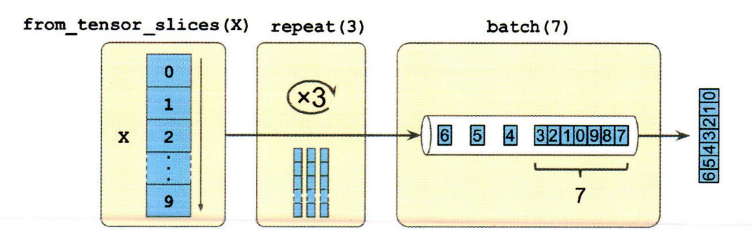

먼저 원본 데이터셋에서 **`repeat(3)`** 메서드를 호출하면 원본 데이터셋의 아이템을 3차례 반복하는 새로운 데이터셋을 반환한다. 이때 메모리에서 데이터셋을 3번 복사하는 것은 아니다. 만약 매개변수 없이 `repeat()` 메서드를 호출하면 원본 데이터셋이 끝없이 반복된다.

그 다음 새로운 데이터셋에서 **`batch(7)`** 메서드를 호출하면 이전 데이터셋의 아이템을 7개씩 그룹으로 묶어서 새로운 데이터셋을 만든다.

마지막으로 마지막 데이터셋의 아이템을 순회한다. 결과에서 볼 수 있듯이 마지막 배치의 크기는 7이 아니라 2이다. 만약 `batch()` 메서드를 **`drop_remainder=True`**로 호출하면 지정한 길이에 모자란 마지막 배치를 버려서 **모든 배치를 동일한 크기**로 맞춘다.

In [ ]:
dataset = dataset.repeat(3).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([8 9], shape=(2,), dtype=int64)


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.repeat(3).batch(7, drop_remainder=True)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)


**`map()`** 메서드를 호출하여 **아이템을 변환**할 수도 있다. `lambda`를 이용하여 원하는 변환 연산을 지정하면 된다.

예를 들어 다음 코드는 모든 아이템에 2를 곱해서 새로운 데이터셋을 만든다.

이 함수는 데이터에 적용되길 원하는 어떤 전처리 작업에도 사용할 수 있다. 가끔 이미지 크기 변환이나 회전 같은 복잡한 계산을 포함하기 때문에 **여러 스레드로 나누어서 속도를 높이는 것**이 좋다. **`num_parallel_calls`** 매개변수를 지정하면 된다.

`map()` 메서드에 전달하는 함수는 **텐서플로 함수로 변환이 가능해야 한다.**

In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.repeat(3).batch(7)
dataset = dataset.map(lambda x: x * 2)
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int64)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int64)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int64)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int64)
tf.Tensor([16 18], shape=(2,), dtype=int64)


`map()` 메서드가 **각 아이템에 변환을 적용**하는 반면, **`apply()**` 메서드는 **데이터셋 전체에 변환을 적용**한다.

예를 들어 다음 코드는 데이터셋에 **`unbatch()`** 함수를 적용한다. 새로 만들어진 데이터셋의 **각 아이템은** 7개의 정수로 이루어진 배치가 아닌 **하나의 정수 텐서**가 된다. 아이템이 [0,2,4,6,8,10,12]에서 0,2,4,6,8,10,12가 된다.

**`filter()`** 메서드를 사용하여 **데이터셋을 필터링**할 수도 있다.

또는 데이터셋에 있는 **몇개의 아이템만** 보고 싶을 때에는 **`take()`** 메서드를 사용한다.

In [ ]:
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset = dataset.filter(lambda x: x < 5)
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [ ]:
for item in dataset.take(2):
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


### 13.1.2 데이터 셔플링
**경사 하강법**은 **훈련 세트에 있는 샘플이 독립적이고 동일한 분포**일 때 **최고의 성능**을 발휘한다. 이렇게 만드는 간단한 방법은 **`shuffle()` 메서드를 사용하여 샘플을 섞는 것**이다.

`shuffle()` 메서드는 먼저 **원본 데이터셋의 처음 아이템을 `buffer_size` 개수만큼 추출하여 버퍼에 채운다.** 그 다음 새로운 아이템이 요청되면 **이 버퍼에서 랜덤하게 하나를 꺼내 반환**한다. 그리고 **원본 데이터셋에서 새로운 아이템을 추출하여 비워진 버퍼를 채운다.**

이렇게 **원본 데이터셋의 모든 아이템이 사용될 때**까지 반복되고, 그 다음엔 **버퍼가 비워질 때**까지 계속하여 랜덤하게 아이템을 반환한다.

`shuffle()` 메서드를 사용하기 위해서는 **버퍼 크기를 지정**해야 한다. 이때 버퍼 크기를 충분히 크게 하는 것이 중요하며, 그렇지 않으면 셔플링의 효과가 감소한다. 다만 보유한 메모리 크기를 넘지는 않아야 한다.

프로그램을 실행할 때마다 **셔플링되는 순서를 동일**하게 만드려면 **랜덤 시드를 부여**한다.

예를 들어 다음 코드는 정수 0에서 9까지 3번 반복된 데이터셋을 만든 다음, 버퍼 크기가 5이고 랜덤 시드는 42를 사용하여 셔플링하고 배치 크기 7로 나누어 출력한다.

In [ ]:
dataset = tf.data.Dataset.range(10).repeat(3) # 0에서 9까지 3번 반복한 데이터셋
dataset = dataset.shuffle(buffer_size=5, seed=42).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 2 3 6 7 9 4], shape=(7,), dtype=int64)
tf.Tensor([5 0 1 1 8 6 5], shape=(7,), dtype=int64)
tf.Tensor([4 8 7 1 2 3 0], shape=(7,), dtype=int64)
tf.Tensor([5 4 2 7 8 9 9], shape=(7,), dtype=int64)
tf.Tensor([3 6], shape=(2,), dtype=int64)


메모리 용량보다 큰 **대규모 데이터셋**은 버퍼가 데이터셋에 비해 작으므로 간단한 셔플링 버퍼 방식으로는 충분하지 않다. 이를 해결하는 방법으로 **원본 데이터 자체를 섞을 수** 있으며, 이렇게 하면 셔플링 효과가 크게 향상된다.

원본 데이터가 섞여 있더라도 **일반적으로 에포크마다 한번 더 섞는다.** 그렇지 않으면 에포크마다 동일한 순서가 반복되어 모델에 편향이 추가된다.

샘플을 더 섞기 위해서 많이 사용하는 방법은 **원본 데이터를 여러 개의 파일로 나눈** 다음에 **훈련하는 동안 무작위로 읽는 것**이다.

하지만 이렇게 해도 동일한 파일에 있는 샘플은 여전히 함께 처리된다. 이를 피하기 위해 **파일 여러 개를 무작위로 선택**하고, 파일에서 **동시에 읽은 레코드를 돌아가면서 반환**할 수 있다. 그 다음에 `shuffle()` 메서드를 사용하여 그 위에 셔플링 버퍼를 추가할 수 있다.

#### 여러 파일에서 한 줄씩 번갈아 읽기
먼저 캘리포니아 주택 데이터셋을 적재하고 섞은 다음, 훈련 세트, 검증 세트, 테스트 세트로 나눈다. 마지막으로 스케일을 조정한다. 데이터셋의 각 행은 8개의 입력 특성과 타겟값인 중간 주택 가격을 가지고 있다.

그 다음에 각 세트를 다음과 같은 CSV 파일 20개로 나눈다.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_
X_std = scaler.scale_

In [ ]:
import os
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    housing_dir = os.path.join("datasets", "housing")
    os.makedirs(housing_dir, exist_ok=True)
    path_format = os.path.join(housing_dir, "my_{}_{:02d}.csv")

    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        with open(part_csv, "wt", encoding="utf-8") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

In [ ]:
import numpy as np
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

train_filepaths = save_to_multiple_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_multiple_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_multiple_csv_files(test_data, "test", header, n_parts=10)

train_filepaths는 훈련 파일 경로를 담은 리스트이다. valid_filepaths와 test_filepaths도 마찬가지이다.

In [ ]:
train_filepaths

['datasets/housing/my_train_00.csv',
 'datasets/housing/my_train_01.csv',
 'datasets/housing/my_train_02.csv',
 'datasets/housing/my_train_03.csv',
 'datasets/housing/my_train_04.csv',
 'datasets/housing/my_train_05.csv',
 'datasets/housing/my_train_06.csv',
 'datasets/housing/my_train_07.csv',
 'datasets/housing/my_train_08.csv',
 'datasets/housing/my_train_09.csv',
 'datasets/housing/my_train_10.csv',
 'datasets/housing/my_train_11.csv',
 'datasets/housing/my_train_12.csv',
 'datasets/housing/my_train_13.csv',
 'datasets/housing/my_train_14.csv',
 'datasets/housing/my_train_15.csv',
 'datasets/housing/my_train_16.csv',
 'datasets/housing/my_train_17.csv',
 'datasets/housing/my_train_18.csv',
 'datasets/housing/my_train_19.csv']

이제 이런 파일 경로가 담긴 데이터셋을 만든다.

기본적으로 **`list_files()`** 함수는 **파일 경로들의 순서를 섞은 데이터셋을 반환**한다. 이것은 일반적으로 바람직한 설정이지만, 만약 이를 원하지 않는다면 `shuffle=False`로 지정할 수 있다.


In [ ]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)

In [ ]:
for filepath in filepath_dataset:
    print(filepath)

tf.Tensor(b'datasets/housing/my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_17.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_14.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_13.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_15.csv', shape=(), dtype=string)
tf.Ten

그 다음으로 **`interleave(5)`** 메서드를 호출하여 한번에 5개의 **파일을 한줄씩 번갈아서 읽는다.** 몇개의 파일을 읽을지는 **`cycle_length`**로 지정한다. 각 파일의 첫번째 줄은 열의 이름이므로 `skip(1)` 메서드를 사용하여 한줄을 건너뛴다.


In [ ]:
n_readers = 5
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers)

`interleave()` 메서드는 filepath_dataset에 있는 5개의 파일 경로에서 데이터를 읽는 데이터셋을 만든다. 이 메서드에 전달한 함수를 각 파일에 대해 호출하여 새로운 데이터셋을 만든다. 명확하게 말하자면 이 단계에서 총 7개의 데이터셋이 존재한다. 파일 경로 데이터셋, 인터리브 데이터셋, 인터리브 데이터셋에 의해 내부적으로 생성된 5개의 데이터셋이다.

인터리브 데이터셋을 반복 구문에 사용하면 5개의 데이터셋을 순회하며, 모든 데이터셋의 아이템이 소진될 때까지 한번에 한줄씩 읽는다. 그 다음에 filepath_dataset에서 다음 5개의 파일 경로를 가져오고, 동일한 방식으로 한줄씩 읽는다. **이 과정이 모든 파일 경로가 소진될 때까지 계속된다.**

기본적으로 `interleave()` 메서드는 **병렬화를 사용하지 않으므로, 각 파일에서 한번에 한줄씩 순서대로 읽는다.** 여러 파일에서 병렬로 읽고 싶다면 `num_parallel_calls`에 원하는 스레드 개수를 지정한다.

지금까지의 데이터셋을 확인해보면 다음과 같다. 이 내용은 CSV 파일의 첫번째 행에 해당하며, 순서는 랜덤하다.

여기에서 볼 수 있듯이 **바이트 스트링**이므로, 이를 **파싱하고 스케일을 조정**할 필요가 있다.

In [ ]:
for line in dataset.take(5):
    print(line.numpy())

b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418'
b'2.4792,24.0,3.4547038327526134,1.1341463414634145,2251.0,3.921602787456446,34.18,-118.38,2.0'
b'4.2708,45.0,5.121387283236994,0.953757225433526,492.0,2.8439306358381504,37.48,-122.19,2.67'
b'2.1856,41.0,3.7189873417721517,1.0658227848101265,803.0,2.0329113924050635,32.76,-117.12,1.205'
b'4.1812,52.0,5.701388888888889,0.9965277777777778,692.0,2.4027777777777777,33.73,-118.31,3.215'


### 13.1.3 데이터 전처리
먼저 전처리를 수행하기 위한 간단한 함수를 만든다. 아래의 함수 코드를 살펴보면 다음과 같다.
 - 이 코드는 훈련 세트에 있는 각 특성의 평균과 표준편차를 미리 계산했다고 가정한다. X_mean과 X_std는 특성마다 1개씩, 총 8개의 실수를 가진 1D 텐서 또는 넘파이 배열이다.
 - `preprocess()` 함수는 CSV 하나의 라인을 받아서 파싱하며, 이를 위해서 `tf.io.decode_csv()` 함수를 사용한다. 이 함수는 2개의 매개변수를 받는데, 첫번째는 파싱할 라인이고 두번째는 CSV 파일의 각 열에 대한 기본값을 담은 배열이다. 이 배열은 텐서플로에게 각 열의 기본값뿐만 아니라 열의 개수와 데이터 타입도 알려준다.
 - 이 예제에서 모든 특성 열이 실수이며, 누락된 값의 기본값은 0으로 지정했다. 마지막 열인 타겟에 `tf.float32` 타입의 빈 배열을 제공하며, 이 배열은 텐서플로에게 이 열은 실수이지만 기본값이 없다고 알려준다. 따라서 타겟 열에서 누락된 값이 발견되면 예외가 발생할 것이다.
 - `decode_csv()` 함수는 열마다 1개씩 스칼라 텐서의 리스트를 반환한다. 1D 텐서 배열을 반환해야 하므로 마지막 타겟 열을 제외하고 모든 텐서에 대해 `tf.stack()` 함수를 호출한다. 이 함수는 모든 텐서를 쌓아서 1D 배열을 만든다. 타겟값에도 동일하게 적용하여 하나의 값을 가진 1D 텐서가 된다.
 - 다음으로 입력 특성에서 평균을 빼고 표준편차로 나누어서 스케일을 조정한다.
 - 마지막으로 스케일이 조정된 특성과 타겟을 담은 튜플을 반환한다.

이 전처리 함수를 테스트하면 다음과 같이 잘 작동한다.

In [ ]:
n_inputs = 8 # X_train.shape[-1]

@tf.function
def preprocess(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    y = tf.stack(fields[-1:])
    return (x - X_mean) / X_std, y

In [ ]:
preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.16579157,  1.216324  , -0.05204565, -0.39215982, -0.5277444 ,
        -0.26334876,  0.8543047 , -1.3072057 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

### 13.1.4 데이터 적재와 전처리를 합치기
재사용이 가능한 코드를 만들기 위해 지금까지 언급한 모든 것을 하나의 헬퍼 함수로 만든다.

즉 이 `csv_reader_dataset()` 함수는 **CSV 파일**에서 **캘리포니아 주택 데이터셋**을 효율적으로 **적재**하고, **전처리, 셔플링, 반복, 배치**를 적용한 데이터셋을 만들어서 **반환**한다.

In [ ]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5,
                       n_read_threads=None, shuffle_buffer_size=10000,
                       n_parse_threads=5, batch_size=32):
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.batch(batch_size)
    return dataset.prefetch(1)

아래의 그림은 위의 함수로 구현된 여러 개의 CSV 파일에서 데이터를 적재하고 전처리하는 과정을 그림으로 나타낸 것이다.

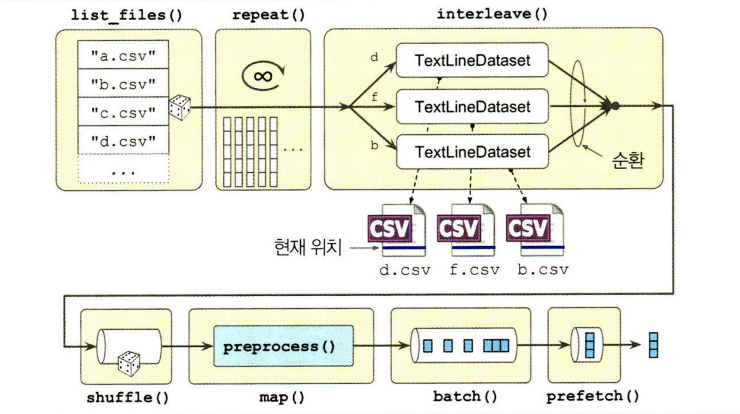

### 13.1.5 프리페치
함수의 마지막 라인에 **`prefetch()`**가 사용되었다. 이렇게 마지막에 `prefetch(1)`을 호출하면 **데이터셋은 항상 하나의 배치가 미리 준비되도록** 최선을 다한다. 즉 훈련 알고리즘이 **한 배치로 작업을 하는 동안 이 데이터셋이 동시에 다음 배치를 준비**한다.

프리페치로 **CPU와 GPU를 동시에 사용**하여, **GPU가 한 배치를 처리**할 때 **CPU가 그 다음 배치를 준비**한다. 이 기능은 아래의 그림에서 나타난 것처럼 알고리즘의 성능을 크게 향상시킨다.

멀티스레드로 데이터를 적재하고 전처리하면 CPU의 멀티 코어를 활용하여 아마도 GPU에서 훈련 스텝을 수행하는 것보다 짧은 시간 안에 한 배치 데이터를 준비할 수 있을 것이다.

즉 CPU에서 GPU로 데이터를 전송하는 시간을 제외하고 GPU를 거의 100% 활용할 수 있으므로, 훈련 속도가 더 빨라질 것이다.

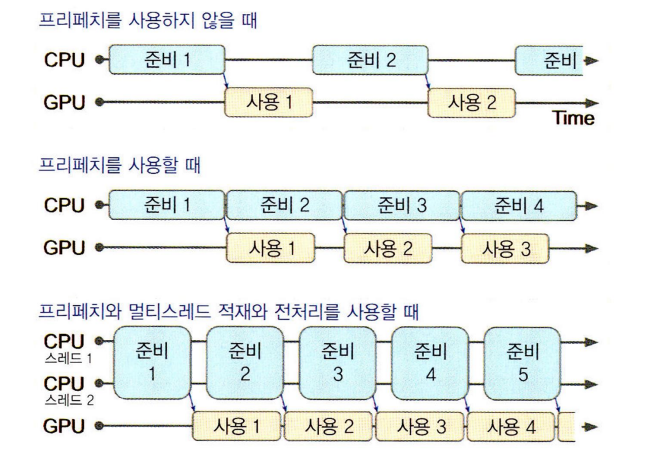

만약 **데이터셋이 메모리에 모두 들어갈 수 있을 정도로 작다**면 **RAM에 모두 캐싱**할 수 있는 **`cache()`** 메서드를 사용하여 훈련 속도를 높일 수 있다.

일반적으로 데이터를 적재하고 전처리한 후, 셔플링, 반복, 배치, 프리페치 하기 **전에 캐싱을 수행**한다. 이렇게 하면 각 샘플을 한번만 읽고 전처리하지만, 에포크마다 다르게 셔플링되고 다음 배치도 미리 준비될 것이다.

여러 텍스트 파일에서 효율적으로 데이터를 읽고 전처리하는 입력 파이프라인을 만들었으며, 가장 많이 사용하는 데이터셋 메서드를 알아보았다.

하지만 이외에도 더 많은 메서드가 존재한다. `concatenate(), zip(), window(), reduce(), shard(), flat_map(), padded_batch()`

### 13.1.6 tf.keras와 데이터셋 사용하기
앞서 정의한 헬퍼 함수 `csv_reader_dataset()` 함수를 이용하여 훈련 세트로 사용할 데이터셋을 만들 수 있다. `tf.keras`에서 반복을 처리하므로 반복을 지정할 필요가 없다.

검증 세트와 테스트 세트로 사용할 데이터셋도 함께 만든다.

이제 케라스 모델을 만들고 이 데이터셋을 이용하여 훈련시킨다. `fit()` 메서드에 훈련 데이터셋과 검증 데이터셋을 전달하기만 하면 된다.

In [ ]:
train_set = csv_reader_dataset(train_filepaths, repeat=None)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [ ]:
batch_size = 32
model.fit(train_set, steps_per_epoch=len(X_train) // batch_size, epochs=10,
          validation_data=valid_set)

Epoch 1/10
362/362 [==============================] - 5s 10ms/step - loss: 1.9622 - val_loss: 1.4932
Epoch 2/10
362/362 [==============================] - 3s 9ms/step - loss: 0.7979 - val_loss: 1.2431
Epoch 3/10
362/362 [==============================] - 2s 6ms/step - loss: 0.6763 - val_loss: 0.6798
Epoch 4/10
362/362 [==============================] - 2s 7ms/step - loss: 0.6032 - val_loss: 0.6465
Epoch 5/10
362/362 [==============================] - 3s 8ms/step - loss: 0.5992 - val_loss: 0.6399
Epoch 6/10
362/362 [==============================] - 3s 9ms/step - loss: 0.5778 - val_loss: 0.5441
Epoch 7/10
362/362 [==============================] - 3s 9ms/step - loss: 0.5349 - val_loss: 0.5295
Epoch 8/10
362/362 [==============================] - 2s 6ms/step - loss: 0.5264 - val_loss: 0.5531
Epoch 9/10
362/362 [==============================] - 3s 7ms/step - loss: 0.4913 - val_loss: 0.5278
Epoch 10/10
362/362 [==============================] - 2s 6ms/step - loss: 0.4956 - val_loss: 0.529

비슷하게 `evaluate()`와 `predict()` 메서드에 test_set을 전달하여 평가, 예측할 수 있다.

In [ ]:
model.evaluate(test_set, steps=len(X_test) // batch_size)

161/161 [==============================] - 1s 3ms/step - loss: 0.4817


0.48171475529670715

In [ ]:
new_set = test_set.map(lambda X, y: X) # we could instead just pass test_set, Keras would ignore the labels
X_new = X_test
model.predict(new_set, steps=len(X_new) // batch_size)

161/161 [==============================] - 1s 4ms/step


array([[1.3675566],
       [1.3001534],
       [1.930862 ],
       ...,
       [2.4427729],
       [2.54769  ],
       [1.823973 ]], dtype=float32)

## 13.2 TFRecord 포맷
**대용량 데이터를 저장하고 효율적으로 읽기** 위해서 텐서플로가 선호하는 포맷은 **TFRecord**이다. TFRecord는 **크기가 다른 연속된 이진 레코드를 저장**하는 단순한 **이진 포맷**이다.

**`tf.io.TFRecordWriter`** 클래스를 사용하여 손쉽게 TFRecord를 **만들 수 있다.**

그 다음에 **`tf.data.TFRecordDataset`**을 사용하여 하나 이상의 TFRecord를 **읽을 수 있다.**

기본적으로 `tf.data.TFRecordDataset`는 **차례로 한번에 하나의 파일을 읽는다.** 이때 **`num_parallel_reads`**에 파일 개수를 지정하면 **동시에 여러 개의 파일**을 읽고, **레코드를 번갈아서 반환**한다. 또는 CSV 파일에 적용했던 것처럼 `list_files()`와 `interleave()`를 사용하여 동일한 결과를 얻을 수 있다.

In [ ]:
with tf.io.TFRecordWriter("my_data.tfrecord") as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [ ]:
filepaths = ["my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


### 13.2.1 압축된 TFRecord 파일
이따금 TFRecord 파일을 압축할 필요가 있는데, 특히 네트워크를 통해 읽어야하는 경우에 그러하다.

`tf.io.TFRecordWriter` 클래스에 매개변수 **`options`**을 사용하여 **압축된 TFRecord 파일을 만들 수 있다.**

**압축된 TFRecord 파일을 읽으려면** `tf.data.TFRecordDataset`에 **압축 형식을 지정**해야 한다.

In [ ]:
options = tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("my_compressed.tfrecord", options) as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [ ]:
dataset = tf.data.TFRecordDataset(["my_compressed.tfrecord"],
                                  compression_type="GZIP")
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


### 13.2.2 프로토콜 버퍼 개요
각 레코드는 어떠한 이진 포맷도 사용할 수 있지만, 일반적으로 **TFRecord는 직렬화된 프로토콜 버퍼를 담고 있다.**

2001년 구글이 개발한 프로토콜 버퍼는 이식성과 확장성이 좋고 효율적인 이진 포맷으로, 요즘에 널리 사용된다.

일반적으로 텐서플로를 사용할 때 프로토콜 버퍼를 설치할 필요는 없다. 하지만 이 절에서 자체적인 프로토콜 버퍼를 간단히 만들어 보기 위해서, **프로토콜 버퍼 컴파일러(protoc)**가 필요하다.

이 프로토콜 버퍼 컴파일러를 사용해 프로토콜 버퍼 정의를 컴파일하여, 코드에서 사용할 수 있는 파이썬 모듈을 만든다.

프로토콜 버퍼는 다음과 같은 간단한 언어를 사용하여 정의한다.

In [ ]:
%%writefile person.proto
syntax = "proto3";
message Person {
  string name = 1;
  int32 id = 2;
  repeated string email = 3;
}

Writing person.proto


이 정의는 프로토콜 버퍼 포맷의 버전3을 사용하고, 각 Person 객체는 선택적으로 string 타입의 name, int32 타입의 id, string 타입의 email 필드를 하나 이상 가진다. 숫자 1,2,3은 필드 식별자로, 레코드의 이진 표현에 사용된다. 이렇게 `.proto` 파일로 **프로토콜 버퍼 정의를 만든 후 컴파일** 할 수 있다.

**프로토콜 버퍼 컴파일러인 `protoc`**를 사용하여 **파이썬 클래스를 생성**한다.

이때 여기에서 사용할 **프로토콜 버퍼 정의는 이미 컴파일되어서 텐서플로 안에 파이썬 클래스로 포함**되어 있다. 따라서 `protoc`을 사용할 필요가 없다. 프로토콜 버퍼 정의에 따라 생성된 파이썬 클래스의 사용 방법을 알면 된다.

기본적인 내용을 설명하기 위해 `Person` 프로토콜 버퍼로 생성된 클래스를 사용하는 간단한 예를 살펴본다.

먼저 생성된 클래스를 임포트하고, Person 객체를 만들어서 출력한다.

In [ ]:
!protoc person.proto --python_out=. --descriptor_set_out=person.desc --include_imports
!ls person*

person.desc  person_pb2.py  person.proto


In [ ]:
from person_pb2 import Person # 클래스 임포트
person = Person(name="Al", id=123, email=["a@b.com"]) # Person 생성
print(person) # Person 출력

name: "Al"
id: 123
email: "a@b.com"



필드를 읽고, 수정할 수 있다.

In [ ]:
person.name # 필드 읽기

'Al'

In [ ]:
person.name = "Alice" # 필드 수정
person.name

'Alice'

필드는 배열처럼 인덱스를 사용할 수 있으며, `append()` 메서드를 사용하여 추가할 수 있다.

In [ ]:
person.email[0] # 배열처럼 사용할 수 있는 반복 필드

'a@b.com'

In [ ]:
person.email.append("c@d.com") # 이메일 추가
person.email

['a@b.com', 'c@d.com']

`SerializeToString()` 메서드를 사용하여 바이트 문자열로 객체를 직렬화할 수 있다.

이 문자열을 저장하거나 네트워크를 통해 전달할 수 있다.

In [ ]:
s = person.SerializeToString() # 바이트 문자열로 객체를 직렬화
s

b'\n\x05Alice\x10{\x1a\x07a@b.com\x1a\x07c@d.com'

새로운 객체를 만들고, `ParseFromString()` 메서드를 사용하여 앞에서 만든 바이트 문자열을 파싱한다. 이를 통해 직렬화한 객체의 복사본을 얻을 수 있다.

그 결과 두 객체가 동일하다.

In [ ]:
person2 = Person()  # 새로운 Person 객체 생성
person2.ParseFromString(s) # 바이트 문자열 파싱 (27 바이트)

27

In [ ]:
person == person2 # 동일

True

직렬화된 Person 객체를 TFRecord 파일로 저장한 다음, 읽고 파싱할 수 있다.

그러나 `SerializeToString()`과 `ParseFromString()` 메서드는 텐서플로 연산이 아니므로 **텐서플로 함수에 포함할 수 없다.**

다행히 **텐서플로는 파싱 연산을 제공**하기 위한 특별한 프로토콜 버퍼 정의를 가지고 있다.

### 13.2.3 텐서플로 프로토콜 버퍼
TFRecord 파일에서 사용하는 전형적인 주요 프로토콜 버퍼는 **데이터셋에 있는 하나의 샘플을 표현**하는 **`Example` 프로토콜 버퍼**이다.

`Example` 프로토콜 버퍼는 **이름을 가진 특성의 리스트**를 가지고 있다. 각 특성은 **바이트 스트링의 리스트나 실수의 리스트, 정수의 리스트 중 하나**이다.

다음은 이 `Example` 프로토콜 버퍼의 정의이다.

    syntax = "proto3";
    message BytesList { repeated bytes value = 1; }
    message FloatList { repeated float value = 1 [packed = true]; }
    message Int64List { repeated int64 value = 1 [packed = true]; }
    message Feature {
    oneof kind {
        BytesList bytes_list = 1;
        FloatList float_list = 2;
        Int64List int64_list = 3;
    }
    };
    message Features { map<string, Feature> feature = 1; };
    message Example { Features features = 1; };

 - BytesList, FloatList, Int64List의 정의는 이해하기 쉽다. packed=true는 효율적인 인코딩을 위하여 반복적인 수치 필드에 사용된다.
 - Features는 **BytesList, FloatList, Int64List 중 하나**를 담고 있다.
 - 복수형인 Features는 특성 이름과 특성 값을 매핑한 **딕셔너리**를 갖는다.
 - 마지막으로 Example은 하나의 Features 객체를 가진다.

다음은 앞의 Person 객체와 동일한 `tf.train.Example` 객체를 만들고, TFRecord 파일에 저장하는 코드이다.

먼저 `Example` 프로토콜 버퍼를 만든다.

In [ ]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example
person_example = Example(
    features=Features(
        feature={
            "name": Feature(bytes_list=BytesList(value=[b"Alice"])),
            "id": Feature(int64_list=Int64List(value=[123])),
            "emails": Feature(bytes_list=BytesList(value=[b"a@b.com", b"c@d.com"]))
        }))

`Example` 프로토콜 버퍼를 만들었으므로 `SerializeToString()` 메서드를 호출하여 직렬화하고, 결과 데이터를 TFRecord 파일에 저장한다.

이렇게 직렬화된 Example을 담은 TFRecord 파일을 만들었으므로, 이를 읽을 수 있다.

In [ ]:
with tf.io.TFRecordWriter("my_contacts.tfrecord") as f:
    f.write(person_example.SerializeToString())

### 13.2.3 Example 프로토콜 버퍼를 읽고 파싱하기
직렬화된 `Example` 프로토콜 버퍼를 읽기 위해서 `tf.data.TFRecordDataset()`을 다시 한번 사용하고, `tf.io.parse_single_example()`를 사용하여 각 Example을 파싱한다.

이 함수는 텐서플로 연산이기 때문에 TF 함수에 포함될 수 있다. 2개의 매개변수가 필요한데, 하나는 **직렬화된 데이터를 담은 문자열 스칼라 텐서**이고 다른 하나는 각 **특성에 대한 설명**이다. 이 설명은 각 특성 이름을 특성의 크기, 타입, 기본값을 표현한 ` tf.io.FixedLenFeature`나 특성의 타입만 표현한 `tf.io.VarLenFeature`에 매핑한 딕셔너리이다.

다음의 코드는 설명 딕셔너리를 정의하고, `TFRecordDataset`을 순회하면서 데이터셋에 포함된 직렬화된 `Example` 프로토콜 버퍼를 파싱한다.

In [ ]:
feature_description = {
    "name": tf.io.FixedLenFeature([], tf.string, default_value=""),
    "id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "emails": tf.io.VarLenFeature(tf.string),
}
for serialized_example in tf.data.TFRecordDataset(["my_contacts.tfrecord"]):
    parsed_example = tf.io.parse_single_example(serialized_example,
                                                feature_description)

In [ ]:
parsed_example

{'emails': SparseTensor(indices=tf.Tensor(
 [[0]
  [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)),
 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}

**고정 길이 특성**은 **보통의 텐서로 파**싱되지만, **가변 길이 특성**은 **희소 텐서로 파싱**된다.

`tf.sparse.to_dense()` 함수로 희소 텐서를 밀집 텐서로 변환할 수 있지만, 여기서는 `values`로 희소 텐서의 값을 바로 참조하는 것이 더 간단하다.

In [ ]:
tf.sparse.to_dense(parsed_example["emails"], default_value=b"")

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [ ]:
parsed_example["emails"].values

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

`tf.io.parse_single_example()` 메서드로 하나씩 파싱하는 대신, **`tf.io.parse_example()`**을 사용하여 **배치 단위로 파싱**할 수 있다.

In [ ]:
dataset = tf.data.TFRecordDataset(["my_contacts.tfrecord"]).batch(10)
for serialized_examples in dataset:
    parsed_examples = tf.io.parse_example(serialized_examples,
                                          feature_description)

**BytesList**는 직렬화된 객체를 포함해서 **원하는 어떤 이진 데이터도 포함**할 수 있다.

예를 들어 `tf.io.encode_jpeg()`를 사용하여 JPEG 포맷 이미지를 인코딩하고, 이 이진 데이터를 BytesList에 넣을 수 있다. 나중에 코드에서 이 TFRecord를 읽을 때 Example을 파싱한 다음, 데이터를 파싱하고 원본 이미지를 얻기 위해 `tf.io.decode_jpeg()`를 호출해야 한다. 또는 JPEG 뿐만 아니라 BMP, GIF, PNG 이미지도 디코딩할 수 있는 **`tf.io.decode_image()`**를 사용할 수 있다,


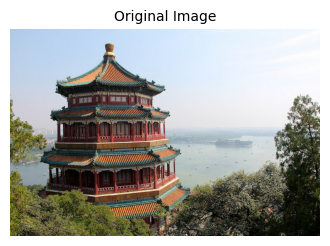

In [ ]:
from sklearn.datasets import load_sample_images
img = load_sample_images()["images"][0]

import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.axis("off")
plt.title("Original Image", fontsize=10)
plt.imshow(img)
plt.show()

In [ ]:
data = tf.io.encode_jpeg(img)
example_with_image = Example(features=Features(feature={
    "image": Feature(bytes_list=BytesList(value=[data.numpy()]))}))
serialized_example = example_with_image.SerializeToString()

In [ ]:
feature_description = { "image": tf.io.VarLenFeature(tf.string) }
example_with_image = tf.io.parse_single_example(serialized_example, feature_description)
decoded_img = tf.io.decode_jpeg(example_with_image["image"].values[0])

In [ ]:
decoded_img = tf.io.decode_image(example_with_image["image"].values[0])

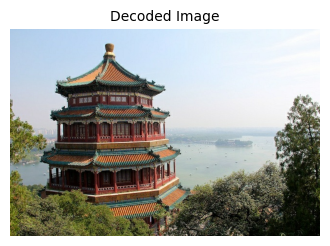

In [ ]:
plt.figure(figsize=(4,3))
plt.title("Decoded Image", fontsize=10)
plt.axis("off")
plt.imshow(decoded_img)
plt.show()

또한 `tf.io.serialize_tensor()`와 `tf.io.parse_tensor()`를 사용해 텐서를 쉽게 직렬화하고 파싱할 수 있다.

`tf.io.serialize_tensor()`는 어떤 텐서라도 직렬화하고, 결과 바이트 스트링을 BytesList 특성에 넣어서 저장할 수 있다.

나중에 TFRecord를 파싱할 때는 `tf.io.parse_tensor()`를 사용하여 이 데이터를 파싱한다.

대부분의 경우에는 `Example` 프로토콜 버퍼로 다루기 충분하지만, 리스트의 리스트를 다룰 때는 조금 사용하기 어렵다.

예를 들어 텍스트 문서를 분류한다고 가정할 때, 각 문서는 문장의 리스트로 표현되고, 각 문장은 단어의 리스트로 표현된다. 또는 각 문서가 코멘트의 리스트를 가지고, 각 코멘트는 단어의 리스트로 표현될 수 있다.

이렇게 **리스트의 리스트**를 다루기 위해 고안된 텐서플로의 **`SequenceExample` 프로토콜 버퍼**가 있다.

### 13.2.4 SequenceExample 프로토콜 버퍼를 사용하여 리스트의 리스트 다루기
다음은 `SequenceExample` 프로토콜 버퍼의 정의이다.

    syntax = "proto3";
    message FeatureList { repeated Feature feature = 1; };
    message FeatureLists { map<string, FeatureList> feature_list = 1; };
    message SequenceExample {
    Features context = 1;
    FeatureLists feature_lists = 2;
    };

 - `SequenceExample`은 문맥 데이터를 위한 하나의 Features 객체와 이름이 있는 한 개 이상의 FeatureList를 가진 FeatureLists 객체를 포함한다.
 - 각 FeatureList는 Feature 객체의 리스트를 포함하고 있다. Feature 객체는 바이트 스트링의 리스트나 64비트 정수의 리스트, 실수의 리스트일 수 있다.

`SequenceExample`을 만들고 직렬화하고 파싱하는 것은 `Example`을 만들고 직렬화하고 파싱하는 것과 비슷하다.

그러나 하나의 `SequenceExample`을 파싱하려면 `tf.io.parse_single_sequence_example()`를 사용하고, 배치를 파싱하려면 `tf.io.parse_sequence_example()`을 사용해야 한다.

두 함수 모두 딕셔너리인 문맥 특성과 딕셔너리인 특성 리스트를 담은 튜플을 반환한다. 특성 리스트가 가변 길이의 시퀀스를 담고 있다면 `tf.RaggedTensor.from_sparse()`를 사용하여 래그드 텐서로 바꿀 수 있다.

## 13.3 입력 특성 전처리
신경망을 위해 데이터를 준비하려면 일반적으로 모든 특성을 수치 특성으로 변환하고 정규화해야 한다. 특히 데이터에 범주형 특성이나 텍스트 특성이 있다면 숫자로 바꾸어야 한다.

**넘파이, 판다스** 등을 사용해서 데이터 파일을 준비하기 전에 처리하거나, **데이터 API**를 사용해서 `map()` 메서드 등으로 데이터를 적재할 때 동적으로 처리할 수 있다.

또는 **전처리 층을 신경망 모델에 직접 포함**시킬 수도 있다. 이 방법에 대해서 자세히 학습한다.

예를 들어 다음의 코드는 `Lambda` 층을 사용하여 표준화를 수행하는 층을 구현하는 방법을 보여준다.

이 층에서는 각 특성의 평균을 빼고 표준편차로 나눈다. 이때 0으로 나눗셈되는 것을 피하기 위해 표준편차에 작은 수를 더한다.

In [ ]:
means = np.mean(X_train, axis=0, keepdims=True)
stds = np.std(X_train, axis=0, keepdims=True)
eps = keras.backend.epsilon()

model = keras.models.Sequential([
    keras.layers.Lambda(lambda inputs: (inputs - means) / (stds + eps)),
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

위처럼 means, stds 같은 전역 변수를 다루기보다, 사이킷런의 `StandardScaler`처럼 **완전한 사용자 정의 층**을 원할 수도 있다. 이는 아래와 같이 `class`를 이용하여 클래스로 구현한다.

이 Standardization **층을 모델에 추가하기 전**에 먼저 **데이터 샘플과 함께 `adapt()` 메서드를 호출**해야 하며, 이렇게 해야 **각 특성에 대해 적절한 평균과 표준편차를 사용**할 수 있다.

이때 함께 사용되는 데이터에 샘플은 전체 데이터셋을 대표할 만큼 충분히 커야 하지만, 전체 훈련 세트일 필요는 없다. 일반적으로 랜덤하게 선택된 수백개의 샘플이면 충분하다.

이제 일반적인 층처럼 이 전처리 층을 사용할 수 있다. `add()` 메서드로 모델에 전처리 층을 추가하고, `compile()` 메서드로 컴파일하고, `fit()` 메서드로 훈련하면 된다.

In [ ]:
class Standardization(keras.layers.Layer):
    def adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis=0, keepdims=True)
        self.stds_ = np.std(data_sample, axis=0, keepdims=True)
    def call(self, inputs):
        return (inputs - self.means_) / (self.stds_ + keras.backend.epsilon())

In [ ]:
std_layer = Standardization()
std_layer.adapt(data_sample)

### 13.3.1 원-핫 벡터를 사용하여 범주형 특성 인코딩하기
캘리포니아 주택 데이터셋의 ocean_proximity 특성은 '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'와 같은 5개의 값이 가능한 범주형 특성으로, 이 특성을 신경망에 주입하기 전에 인코딩해야 한다. 범주의 개수가 많지 않으므로 **원-핫 인코딩**을 사용할 수 있다.

In [ ]:
import os
import tarfile
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [ ]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

이를 위해 먼저 `lookup` 룩업 테이블을 사용하여 각 범주를 0에서 4까지의 인덱스로 매핑한다.

In [ ]:
vocab = ["<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]
indices = tf.range(len(vocab), dtype=tf.int64)
table_init = tf.lookup.KeyValueTensorInitializer(vocab, indices)
num_oov_buckets = 2
table = tf.lookup.StaticVocabularyTable(table_init, num_oov_buckets)

- 먼저 **어휘 사전을 정의**한다. 어휘 사전은 **가능한 모든 범주의 리스트**이다.
- 범주에 해당하는 **인덱스의 텐서**를 만든다.
- 범주 리스트와 해당 인덱스를 전달하여 **룩업 테이블을 위한 초기화 객체**를 만든다. 이 예에서는 이미 이 데이터를 가지고 있으므로 `KeyValueTensorInitializer`를 사용한다. 그러나 만약 범주가 텍스트 파일에 라인당 하나의 범주로 나열되어 있다면 `TextFileInitializer`를 사용한다.
- 마지막 두 라인에서 **초기화 객체와 oov(out-of-vocabulary) 버킷**을 지정하여 **룩업 테이블**을 만든다. **어휘 사전에 없는 범주**를 찾으면 룩업 테이블이 계산한 이 범주의 **해시값을 이용하여 oov 버킷 중 하나에 할당**한다. 인덱스는 알려진 범주 다음부터 시작하므로, 이 예제에서 2개의 oov 버킷의 인덱스는 5와 6이다.

만약 범주 개수가 많고 데이터셋이 크거나 범주가 자주 바뀐다면 **전체 범주의 리스트를 구하는 것이 어려울 수 있다.** 이를 위한 한가지 해결책은 전체 훈련 세트가 아닌 **샘플 데이터를 기반으로 어휘 사전을 정의**하고, 샘플 데이터에 없는 **다른 범주를 oov 버킷에 추가**하는 것이다. 훈련 도중 발견되는 알려지지 않은 범주가 많을수록 더 많은 oov 버킷을 사용해야 한다.

실제 **oov 버킷이 충분하지 않으면 충돌이 발생**할 수 있다. 즉 다른 범주가 동일한 버킷에 할당되는 것이다. 그러면 신경망이 두 범주를 구분할 수 없을 것이다.

이제 **`lookup` 테이블을 사용**하여 몇 개의 범주 특성을 **원-핫 벡터로 인코딩**한다.

In [ ]:
categories = tf.constant(["NEAR BAY", "DESERT", "INLAND", "INLAND"])
cat_indices = table.lookup(categories)
cat_indices

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1])>

`lookup` 메서드로 각 범주를 인덱스에 매핑시킨 결과, "NEAR BAY"는 인덱스 3에 매핑되었고, 어휘 사전에 없었던 "DESERT"는 2개의 oov 버킷 중 하나인 인덱스 5에 매핑되었다. 2개의 "INLAND"는 인덱스 1에 매핑되었다.

다음으로 **`tf.one_hot()`** 함수를 사용하여 **인덱스를 원-핫 인코딩**할 수 있다.

이 함수에는 인코딩하고 싶은 인덱스와 매개변수 `depth`에 **어휘 사전의 크기와 oov 버킷 수**를 더한 **인덱스의 총 개수를 지정**해야 한다.

In [ ]:
cat_one_hot = tf.one_hot(cat_indices, depth=len(vocab) + num_oov_buckets)
cat_one_hot

<tf.Tensor: shape=(4, 7), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

원-핫 벡터의 크기는 어휘 사전의 길이와 oov 버킷의 개수를 더한 것이다. 가능한 범주가 몇 개 되지 않을 때는 괜찮지만, 만약 **어휘 사전이 크다면 임베딩을 사용하여 인코딩**하는 것이 훨씬 효율적이다.

경험적으로 범주 개수가 10개 이하면 일반적으로 원-핫 인코딩을 사용한다. 그리고 범주 개수가 50개 이상이면 임베딩이 선호되는 편이다. 만약 범주의 개수가 10개에서 50개 사이라면 두 방식을 모두 실험해서 어떤 것이 주어진 문제에 최선인지 확인하는 것이 좋다.

### 13.2.2 임베딩을 사용하여 범주형 특성 인코딩하기
**임베딩**은 **범주를 표현하는 훈련 가능한 밀집 벡터**이다.

처음에는 임베딩이 **랜덤하게 초기화**되어 있다. 예를 들어 "NEAR BAY" 범주는 초기에 [0.131,0.890]과 같은 랜덤 벡터로 표현되고, "NEAR OCEAN"은 [0.631,0.791]과 같은 또 다른 랜덤 벡터로 표현된다. 이 예에서는 2D 임베딩을 사용하지만 **차원 수는 수정이 가능한 하이퍼파라미터**이다.

임베딩은 훈련이 가능하기 때문에 훈련 도중에 점차 향상되며, **비슷한 범주들은 경사 하강법이 더 가깝게 만들 것**이다.

표현이 좋을수록 신경망이 정확한 예측을 만들기 쉽다. 따라서 임베딩은 **범주가 유용하게 표현되도록 훈련되는 경향**이 있으며, 이를 **표현 학습**이라고 한다.

임베딩의 동작 원리를 이해하기 위해 임베딩을 직접 구현하는 방법을 알아본다.

먼저 **각 범주의 임베딩을 담은 임베딩 행렬**을 만들어서 **랜덤하게 초기화**한다. 이 행렬은 **범주(어휘 사전의 길이)와 oov 버킷마다 하나의 행**이 있고, **임베딩 차원마다 하나의 열**을 가진다.

이 예에서는 임베딩 차원으로 2개의 차원을 사용한다. 하지만 일반적으로 임베딩은 작업과 어휘 사전의 크기에 따라서 10에서 300 차원을 갖는다.

In [ ]:
embedding_dim = 2
embed_init = tf.random.uniform([len(vocab) + num_oov_buckets, embedding_dim])
embedding_matrix = tf.Variable(embed_init)
embedding_matrix

<tf.Variable 'Variable:0' shape=(7, 2) dtype=float32, numpy=
array([[0.6645621 , 0.44100678],
       [0.3528825 , 0.46448255],
       [0.03366041, 0.68467236],
       [0.74011743, 0.8724445 ],
       [0.22632635, 0.22319686],
       [0.3103881 , 0.7223358 ],
       [0.13318717, 0.5480639 ]], dtype=float32)>

각 범주의 임베딩을 담아 초기화한 이 임베딩 행렬은 랜덤한 6x2 행렬이며, 변수에 저장된다. 따라서 훈련 과정에서 경사 하강법으로 학습할 수 있다.

이제 이 임베딩을 사용하여 앞의 예제와 동일한 범주 특성을 인코딩한다.

**`tf.nn.embedding_lookup()`** 함수는 **임베딩 행렬에서 주어진 인덱스에 해당하는 행**을 찾는다.

예를 들어 룩업 테이블에서 "INLAND" 범주의 인덱스가 1이므로, `tf.nn.embedding_lookup()` 함수가 이 임베딩 행렬에서 2번째 행에 있는 임베딩 [0.3528825, 0.46448255]를 2번 반환한다.

In [ ]:
categories = tf.constant(["NEAR BAY", "DESERT", "INLAND", "INLAND"])
cat_indices = table.lookup(categories)
cat_indices

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1])>

In [ ]:
tf.nn.embedding_lookup(embedding_matrix, cat_indices)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[0.74011743, 0.8724445 ],
       [0.3103881 , 0.7223358 ],
       [0.3528825 , 0.46448255],
       [0.3528825 , 0.46448255]], dtype=float32)>

케라스는 **임베딩 행렬을 처리**해주는 **`keras.layers.Embedding`** 층을 제공한다.

이 층이 생성될 때 임베딩 행렬을 랜덤하게 초기화하고, 어떤 범주 인덱스로 호출될 때 이 임베딩 행렬에 있는 호출된 인덱스에 해당하는 행을 반환한다.

In [ ]:
embedding = keras.layers.Embedding(input_dim=len(vocab) + num_oov_buckets, output_dim=embedding_dim)
embedding(cat_indices)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[ 0.0266316 ,  0.00220252],
       [-0.04001428,  0.03273579],
       [-0.00126005, -0.01405255],
       [-0.00126005, -0.01405255]], dtype=float32)>

이를 모두 연결하면 범주형 특성을 처리하고, 각 범주마다 임베딩을 학습하는 케라스 모델을 만들 수 있다.

이 모델은 2개의 입력을 받는다. 샘플마다 8개의 특성을 담은 입력과 샘플마다 하나의 범주형 특성을 담은 하나의 범주형 입력이다.

먼저 `Lambda` 층을 사용해서 범주의 인덱스를 찾은 다음, 임베딩에서 이 인덱스를 찾는다. 그 다음 이 임베딩과 일반 입력을 연결하여 신경망에 주입할 인코드된 입력을 만든다.


In [ ]:
regular_inputs = keras.layers.Input(shape=[8])
categories = keras.layers.Input(shape=[], dtype=tf.string)
cat_indices = keras.layers.Lambda(lambda cats: table.lookup(cats))(categories)
cat_embed = keras.layers.Embedding(input_dim=6, output_dim=2)(cat_indices)
encoded_inputs = keras.layers.concatenate([regular_inputs, cat_embed])
outputs = keras.layers.Dense(1)(encoded_inputs)
model = keras.models.Model(inputs=[regular_inputs, categories],
                           outputs=[outputs])

만약 **`keras.layers.TextVectorization`** 층을 사용할 수 있다면 `adapt()` 메서드를 호출하여 **샘플 데이터에서 어휘 사전을 추출**한다. 이 함수에서 **룩업 테이블을 만든다.**

그 다음 이 층을 모델에 추가하여 인덱스 룩업을 수행할 수 있으며, 이는 위의 코드에서 `Lambda` 층을 대신한다.

### 13.3.3 케라스 전처리 층
**특성 열 API**는 케라스 전처리 층을 제공한다.

앞에서 이미 케라스 전처리 층 중 2개를 소개했다. **`keras.layers.Normalization`** 층은 **특성 표준화**를 수행하고, **`keras.layers.TextVectorization`** 층은 입력에 있는 **각 단어를 어휘 사전에 있는 인덱서에 인코딩**한다.

두 경우 모두 층을 만들고 샘플 데이터를 이용하여 `adapt()` 메서드를 호출한 다음, 일반적인 층처럼 모델에 사용할 수 있다.

특성 열 API에 포함될 **`keras.layers.Discretization`** 층은 **연속적인 데이터를 몇 개의 구간으로 나누고, 각 구간을 원-핫 벡터로 인코딩**한다.

예를 들어 가격 데이터를 낮음, 중간, 높음 3개의 범주로 나누어서 각각 [1,0,0],[0,1,0],[0,0,1]로 인코딩할 수 있다. 물론 이렇게 하면 많은 정보를 잃을 수 있지만, 어떤 경우에는 연속적인 값으로 볼때 확실하지 않은 패턴을 감지하는데 도움이 될 수도 있다.

또한 **`PreprocessingStage`** 클래스를 사용해서 **여러 전처리 층을 연결**할 수 있다.

예를 들어 아래의 코드는 먼저 입력을 정규화하고, 그 다음에 이산화(discretization)하는 전처리 파이프라인을 만든다. 이렇게 만든 파이프라인을 샘플 데이터에 적응시킨 다음에 일반적인 층처럼 모델에 사용할 수 있다.

In [ ]:
normalization = keras.layers.Normalization()
discretization = keras.layers.Discretization()
pipeline = keras.layers.PreprocessingStage([normalization, discretization])
pipeline.adapt(data_sample)

**`TextVectorization`** 층은 단어 인덱스 대신 **카운트 벡터를 출력**하는 옵션을 가지고 있다.

예를 들어 어휘 사전에 3개의 단어 ["and", "basketball", "more"]가 들어있다고 가정하면, 텍스트 "more and more"는 벡터 [1,0,2]로 매핑된다. "and"는 1번, "more"은 2번 등장하며, "basketball"은 전혀 등장하지 않는다.

이런 텍스트 표현은 **단어의 순서를 완전히 무시**하기 때문에 **BOW**(Bag Of Word)라고 한다.

"and"와 같은 단어는 흔하게 등장하므로 보통은 중요한 정보가 없지만 대부분의 텍스트에서 큰 값을 갖는다. 반면 "more and more basketball"이라는 텍스트에서 "basketball"은 자주 등장하는 단어가 아니므로 확실히 가장 중요한 단어이다.

따라서 **단어 카운트**는 **자주 등장하는 단어의 중요도를 줄이는 방향으로 정규화**되어야 한다. 이를 위해 자주 사용하는 방법은 **전체 샘플 수를 단어가 등장하는 훈련 샘플 개수로 나눈 로그를 계산**한 후, **단어 카운트와 곱하는 것**이다. 이런 기법을 **TF-IDF(Term Frequency-Inverse Document Frequency)**라고 한다.

만약 "and", "basketball", "more" 단어가 훈련 세트에서 각각 200번, 10번, 100번 등장하고 전체 샘플 개수가 500개라면, 최종 벡터는 $[1*\log(1+500/(1+200)), 0*\log(1+500/(1+10)), 2*\log(1+500/(1+100))]$가 되므로 약 [1.25,0,3.57]가 된다.

## 13.4 TF 변환
**전처리는** 계산 비용이 크기 때문에 훈련과 동시에 수행하는 것보다 **사전에 처리하면 속도를 크게 높일 수 있다.** 즉 데이터가 훈련하는 동안 에포크마다 전처리되는 것이 아니라, **훈련 하기 전에 샘플마다 한번씩만 전처리**된다.

앞서 언급한 것처럼 데이터셋이 RAM에 들어갈만큼 충분히 작다면 `cache()` 메서드를 사용할 수 있으나, 데이터가 아주 크면 아파치빔이나 스파크 같은 도구가 도움이 된다. 이런 도구로 대규모 데이터에서 효율적인 데이터 처리 파이프라인을 수행할 수 있으므로 훈련 전에 모든 훈련 데이터를 전처리할 수 있다.

이런 방식으로 훈련 속도를 높일 수 있지만 한가지 문제가 있다. 모델을 훈련하고 모바일 앱에 모델을 배포한다고 가정할 때, 모델에 주입될 데이터를 전처리하기 위해 앱에 어떤 코드를 따로 추가해야 한다. 이는 유지 보수를 아주 어렵게 만드며, 전처리 과정을 바꿀 때마다 코드를 수정해야 한다.

따라서 많은 시간이 걸릴 뿐만 아니라 에러를 만들기 쉽고, 훈련 전에 수행한 전처리 연산과 앱이나 브라우저에서 수행하는 전처리가 차이가 날 수 있다. 이런 훈련/서빙 왜곡은 버그나 성능 감소로 이어질 가능성이 높다.

TF 변환은 텐서플로 모델 상품화를 위한 엔드-투-엔드 플랫폼인 TFX의 일부분이다. TFX는 텐서플로와 함께 제공되지 않으므로, TF 변환과 같은 TFX 컴포넌트를 사용하려면 먼저 TFX를 설치해야 한다.

그 다음으로 스케일링, 버킷 할당 등과 같은 TF 변환 함수를 사용하여 전처리 함수를 한번만 정의한다. 또한 필요한 어떤 텐서플로 연산도 사용할 수 있다.

In [ ]:
!pip3 install -U tensorflow-transform

다음은 2개의 특성을 전처리하는 함수를 정의한 것이다.

In [ ]:
import tensorflow_transform as tft

def preprocess(inputs):  # inputs is a batch of input features
    median_age = inputs["housing_median_age"]
    ocean_proximity = inputs["ocean_proximity"]
    standardized_age = tft.scale_to_z_score(median_age - tft.mean(median_age))
    ocean_proximity_id = tft.compute_and_apply_vocabulary(ocean_proximity)
    return {
        "standardized_median_age": standardized_age,
        "ocean_proximity_id": ocean_proximity_id
    }

아파치 빔을 사용하여 정의한 이 `preprocess()` 함수를 전체 훈련 세트에 적용할 수 있다. 이 과정에서 **전체 훈련 세트에 대하여 필요한 모든 통계를 계산**한다. 이 예제에서는 housing_median_age 특서의 평균, 표준편차와 ocean_proximity 특성의 어휘 사전을 계산한다. 이런 **통계들을 계산하는 컴포넌트**를 **애널라이저**라고 한다.

**TF 변환**은 **배포할 모델에 추가**할 수 있도록 **동일한 역할을 수행하는 텐서플로 함수를 생성한다**는 것이 중요하다. 이 **TF 함수는** 아파치 빔에서 계산하는 평균, 표준편차, 어휘사전 같은 **필요한 모든 통계에 해당하는 상수를 가지고 있다.**

## 13.5 텐서플로 데이터셋(TFDS)
텐서플로 데이터셋을 사용하면 널리 사용하는 데이터셋을 손쉽게 다운로드할 수 있다. MNIST, 패션 MNIST와 같은 작은 것부터 이미지넷 같은 커다란 데이터셋까지 제공한다.

TFDS는 텐서플로에 기본으로 포함되어 있지 않으므로 `tensorflow-datasets` 라이브러리를 설치해야 사용할 수 있다. 그 다음 **`tfds.load()`** 함수에 원하는 **데이터셋 이름을 지정하여 호출해서 다운로드**하고, **데이터셋의 딕셔너리로 데이터를 반환**한다.

예를 들어 다음 코드를 이용하여 MNIST 데이터셋을 다운로드한다.

그 다음에는 셔플링, 배치 나누기, 프리페칭 등 원하는 변환을 적용하여 모델을 훈련하기 위한 데이터셋을 준비할 수 있다.

In [ ]:
import tensorflow_datasets as tfds

datasets = tfds.load(name="mnist")
mnist_train, mnist_test = datasets["train"], datasets["test"]

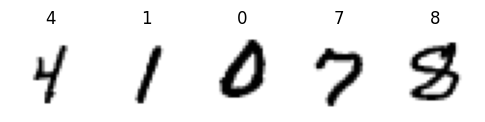

In [ ]:
plt.figure(figsize=(6,3))
mnist_train = mnist_train.repeat(5).batch(32).prefetch(1)
for item in mnist_train:
    images = item["image"]
    labels = item["label"]
    for index in range(5):
        plt.subplot(1, 5, index + 1)
        image = images[index, ..., 0]
        label = labels[index].numpy()
        plt.imshow(image, cmap="binary")
        plt.title(label)
        plt.axis("off")
    break

데이터셋에 있는 각 아이템은 특성과 레이블을 담은 딕셔너리이다.

케라스는 두 원소 특성과 레이블을 담은 튜플 아이템을 기대하므로, `map()` 메서드를 사용하여 데이터셋을 이런 식으로 변환할 수 있다.

In [ ]:
mnist_train = mnist_train.shuffle(10000).batch(32)
mnist_train = mnist_train.map(lambda items: (items["image"], items["label"]))
mnist_train = mnist_train.prefetch(1)
for images, labels in mnist_train.take(1):
    print(images.shape)
    print(labels.numpy())

(32, 32, 28, 28, 1)
[[7 0 0 ... 4 1 8]
 [2 7 5 ... 4 2 8]
 [1 1 4 ... 9 7 5]
 ...
 [8 0 8 ... 1 3 5]
 [2 0 0 ... 4 6 2]
 [3 1 6 ... 5 8 8]]


그러나 `tfds.load()` 함수에 매개변수 `as_supervised=True`로 지정하여 호출하는 것이 더 간단하다. 당연히 이는 레이블된 데이터셋에만 적용할 수 있다.

또한 원하는 배치 크기를 지정할 수도 있다.

그 다음에 `tf.keras` 모델에 바로 이 데이터셋을 전달할 수 있다.

In [ ]:
datasets = tfds.load(name="mnist", batch_size=32, as_supervised=True)
mnist_train = datasets["train"].prefetch(1)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Lambda(lambda images: tf.cast(images, tf.float32)),
    keras.layers.Dense(10, activation="softmax")])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
model.fit(mnist_train, steps_per_epoch=60000 // 32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 32.4526 - accuracy: 0.8424
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 26.1808 - accuracy: 0.8691
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 24.9810 - accuracy: 0.8735
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 24.5448 - accuracy: 0.8756
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 23.6467 - accuracy: 0.8785
